In [1]:
import json

In [4]:
with open('./example-argumentation-framework.json', 'r') as f:
    data = json.load(f)

In [5]:
data

{'Arguments': {'0': 'We should go to the cinema.',
  '1': 'We should go to the gym.',
  '2': 'The gym is better for the health than the cinema.',
  '3': 'We have no time for evening activities, since there is an exam coming up.',
  '4': 'The exam is in a few weeks.',
  '5': 'We have no money for cinema or gym.',
  '6': 'We just got our sallaries.'},
 'Attack Relations': [['0', '1'],
  ['1', '0'],
  ['2', '0'],
  ['3', '0'],
  ['3', '1'],
  ['4', '3'],
  ['5', '0'],
  ['5', '1'],
  ['6', '5']]}

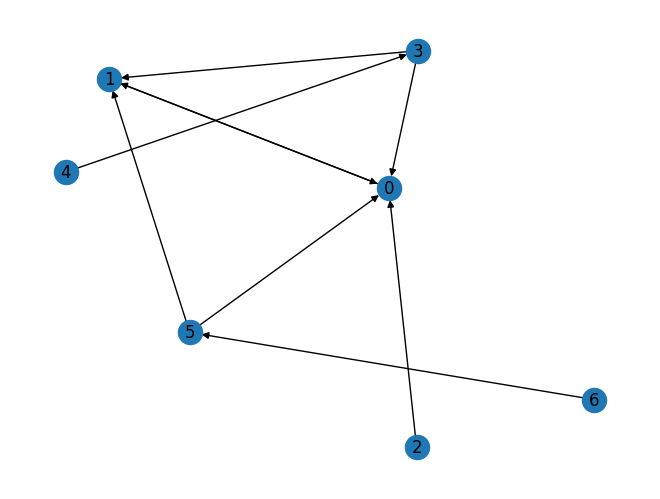

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize a directed graph
G = nx.DiGraph()

# Add nodes to the graph
G.add_nodes_from(data['Arguments'].keys())

# Add edges to the graph
G.add_edges_from(data['Attack Relations'])

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()
